## Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import CSV files

In [22]:
df1 = pd.read_csv("DataSet1.csv")
df2 = pd.read_csv("DataSet2.csv")
df3 = pd.read_csv("DataSet3.csv")

## Handle Values

In [23]:
#Drop missing values
df2.dropna(inplace=True)
df2.reset_index(drop=True, inplace=True)
print(df2.isnull().sum())

#Add BMI column for dataset3
df3["Height (m)"] = df3["Height (cm)"] / 100
df3["BMI"] = df3["Weight (kg)"] / (df3["Height (m)"] ** 2)
df3["BMI"] = df3["BMI"].round(2)

# Drop unneccessary columns to reduce redundancy
df3 = df3[df3["Gender"] != "Other"]
df1 = df1.drop(columns=["Weight (kg)","Height (m)","Workout_Type"])
df2 = df2.drop(columns=["Weight (kg)","Height (m)","Workout_Type"])
df3 = df3.drop(columns=["User ID","Workout Type","Mood Before Workout","Mood After Workout","VO2 Max","Height (m)",
                        "Workout Intensity","Weight (kg)","Height (cm)","Water Intake (liters)","Body Fat (%)"])
df3.reset_index(drop=True, inplace=True)

# Encode Gender
df1['Gender'] = df1['Gender'].map({'Male': 0, 'Female': 1})
df2['Gender'] = df2['Gender'].map({'Male': 0, 'Female': 1})
df3['Gender'] = df3['Gender'].map({'Male': 0, 'Female': 1})

#Turn unncesary float number to integer Ex: age, frequency, level
df2["Age"] = df2["Age"].round(0).astype(int)
df2["Workout_Frequency (days/week)"] = df2["Workout_Frequency (days/week)"].round(0).astype(int)
df2["Experience_Level"] = df2["Experience_Level"].round(0).astype(int)
df2["Calories_Burnedl"] = df2["Calories_Burned"].round(0).astype(int)





Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [24]:
df1.head()

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,0,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20
1,46,1,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00
2,32,1,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71
3,25,0,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41
4,38,0,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39


In [25]:
df2.head()

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Calories_Burnedl
0,34,1,174,152.0,74.0,1.12,712.0,12.8,2.4,5,2,14.31,712
1,26,1,166,156.0,73.0,1.00,833.0,27.9,2.8,5,2,33.49,833
2,22,0,187,166.0,64.0,1.24,1678.0,28.7,1.9,3,2,12.73,1678
3,54,1,187,169.0,58.0,1.45,628.0,31.8,2.4,4,1,20.37,628
4,34,1,177,169.0,66.0,1.60,1286.0,26.4,3.2,4,2,20.83,1286


In [26]:
df3.head()

,Age,Gender,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),BMI
0,39,0,79,384,112,8850,14.44,8.2,3195,61,32.33
1,25,1,27,540,133,18898,7.28,9.8,3362,80,20.37
2,56,0,39,672,118,14102,6.55,5.8,2071,65,37.53
3,33,0,11,301,142,10895,6.53,4.2,2401,69,30.86
4,48,1,109,351,114,4687,6.47,4.3,2310,72,35.96


## convert objects to numerical values 

In [27]:
df2['Max_BPM'] = pd.to_numeric(df2['Max_BPM'], errors='coerce')
df2['BMI'] = pd.to_numeric(df2['BMI'], errors='coerce')

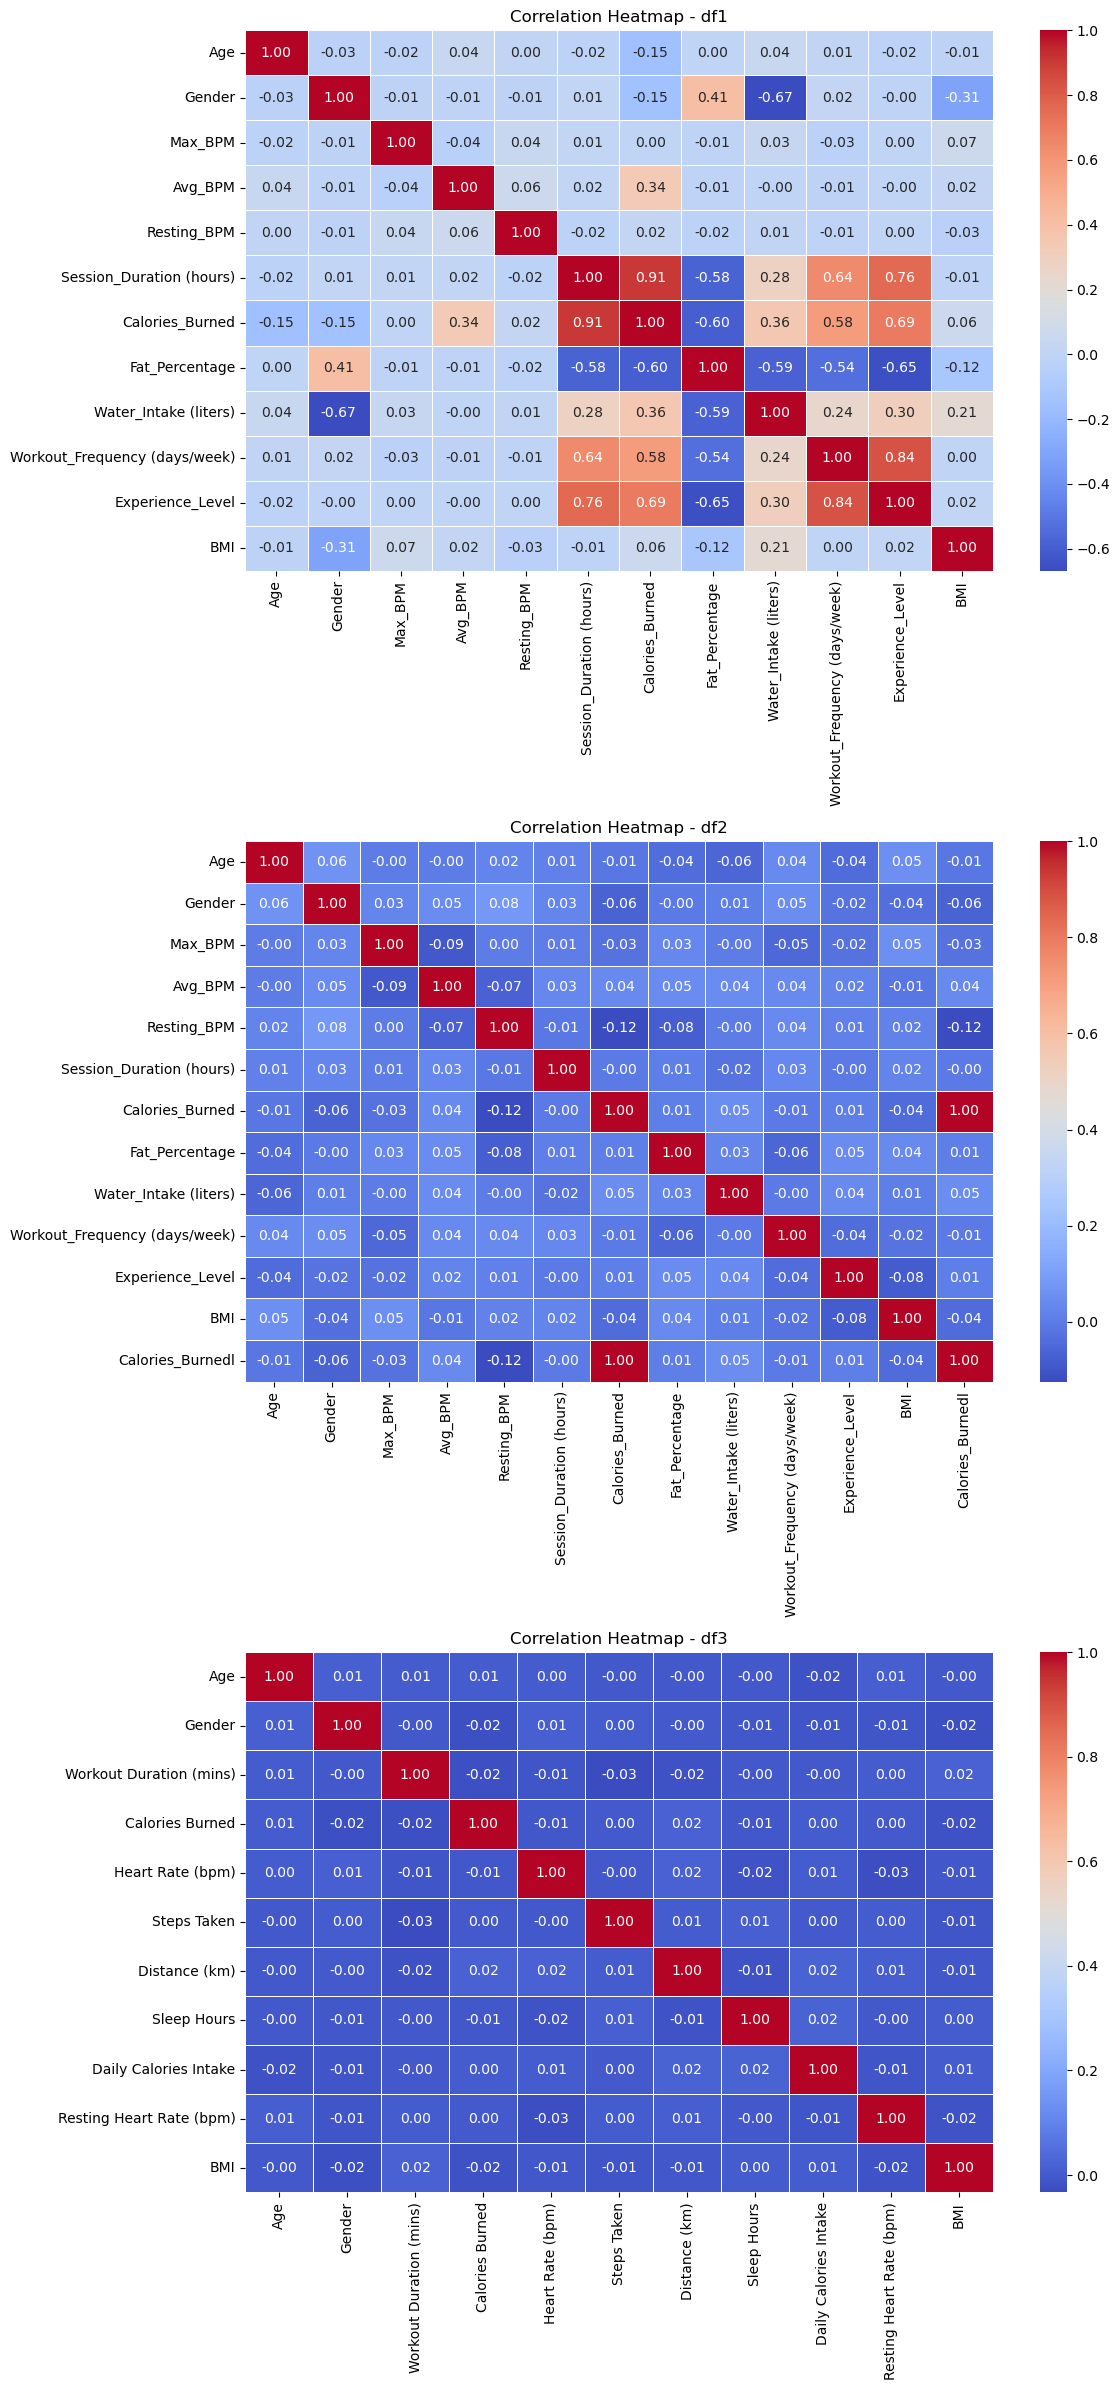

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrices
correlation_matrix1 = df1.corr()
correlation_matrix2 = df2.corr()
correlation_matrix3 = df3.corr()

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(12, 24))  # 1 row, 3 columns

# Heatmap for df1
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Correlation Heatmap - df1')

# Heatmap for df2
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Correlation Heatmap - df2')

# Heatmap for df3
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[2])
axes[2].set_title('Correlation Heatmap - df3')

# Adjust layout
plt.tight_layout()
plt.show()


## Split Data for Training

In [29]:
from sklearn.model_selection import train_test_split

X1 = df1.drop(columns="Calories_Burned")
y1 = df1["Calories_Burned"]
X2 = df2.drop(columns="Calories_Burned")
y2 = df2["Calories_Burned"]
X3 = df3.drop(columns="Calories Burned")
y3 = df3["Calories Burned"]

X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X1,y1,random_state=42,test_size=0.2)
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X2,y2,random_state=42,test_size=0.2)
X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(X3,y3,random_state=42,test_size=0.2)


print(f"Dataset1: {X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape}")
print(f"Dataset2: {X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape}")
print(f"Dataset3: {X_train_3.shape, X_test_3.shape, y_train_3.shape, y_test_3.shape}")

Dataset1: ((778, 11), (195, 11), (778,), (195,))
Dataset2: ((1087, 12), (272, 12), (1087,), (272,))
Dataset3: ((5286, 10), (1322, 10), (5286,), (1322,))


In [30]:
print(X_train_1.dtypes)

Age                                int64
Gender                             int64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object


In [31]:
print(X_train_2.dtypes)

# Convert object to numeric values
X_train_2["Max_BPM"] = pd.to_numeric(X_train_2["Max_BPM"], errors="coerce")
X_test_2["Max_BPM"] = pd.to_numeric(X_test_2["Max_BPM"], errors="coerce")

Age                                int32
Gender                             int64
Max_BPM                          float64
Avg_BPM                          float64
Resting_BPM                      float64
Session_Duration (hours)         float64
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int32
Experience_Level                   int32
BMI                              float64
Calories_Burnedl                   int32
dtype: object


## XGBoost

In [32]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Train XGBoost model
model_1 = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42,max_depth=6)    
model_2 = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42,max_depth=6) 
model_3 = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42,max_depth=6) 

model_1.fit(X_train_1, y_train_1)
model_2.fit(X_train_2, y_train_2)
model_3.fit(X_train_3, y_train_3)

# Predict and evaluate
y_pred_1 = model_1.predict(X_test_1)
y_pred_2 = model_2.predict(X_test_2)
y_pred_3 = model_3.predict(X_test_3)

mae_1 = mean_absolute_error(y_test_1, y_pred_1) 
mae_2 = mean_absolute_error(y_test_2, y_pred_2)
mae_3 = mean_absolute_error(y_test_3, y_pred_3)

mse_1 = mean_squared_error(y_test_1, y_pred_1) 
mse_2 = mean_squared_error(y_test_2, y_pred_2)
mse_3 = mean_squared_error(y_test_3, y_pred_3)


r2_1 = r2_score(y_test_1, y_pred_1)
r2_2 = r2_score(y_test_2, y_pred_2)
r2_3 = r2_score(y_test_3, y_pred_3)

print(f"Dataset1: mae_score: {mae_1} mse_score: {mse_1} r2_score: {r2_1}")
print(f"Dataset2: mae_score: {mae_2} mse_score: {mse_2} r2_score: {r2_2}")
print(f"Dataset3: mae_score: {mae_3} mse_score: {mse_3} r2_score: {r2_3}")

Dataset1: mae_score: 23.915398543920272 mse_score: 1364.2685589302762 r2_score: 0.9836467708766352
Dataset2: mae_score: 2.1035891140208527 mse_score: 12.53700615229044 r2_score: 0.9998778880842988
Dataset3: mae_score: 231.488091969454 mse_score: 74074.19047756451 r2_score: -0.11793887615203857


In [33]:
# print(X_train_3.describe())
print(X_train_3.corr())

                               Age    Gender  Workout Duration (mins)  \
Age                       1.000000  0.015485                 0.010995   
Gender                    0.015485  1.000000                -0.000356   
Workout Duration (mins)   0.010995 -0.000356                 1.000000   
Heart Rate (bpm)          0.002272  0.011872                -0.000902   
Steps Taken               0.000116  0.008780                -0.027849   
Distance (km)             0.004608 -0.004355                -0.024689   
Sleep Hours               0.001813  0.000537                 0.003278   
Daily Calories Intake    -0.019880 -0.010565                -0.004050   
Resting Heart Rate (bpm)  0.013838  0.001281                 0.009833   
BMI                      -0.000998 -0.036599                 0.021281   

                          Heart Rate (bpm)  Steps Taken  Distance (km)  \
Age                               0.002272     0.000116       0.004608   
Gender                            0.011872     0

## Data Visualization

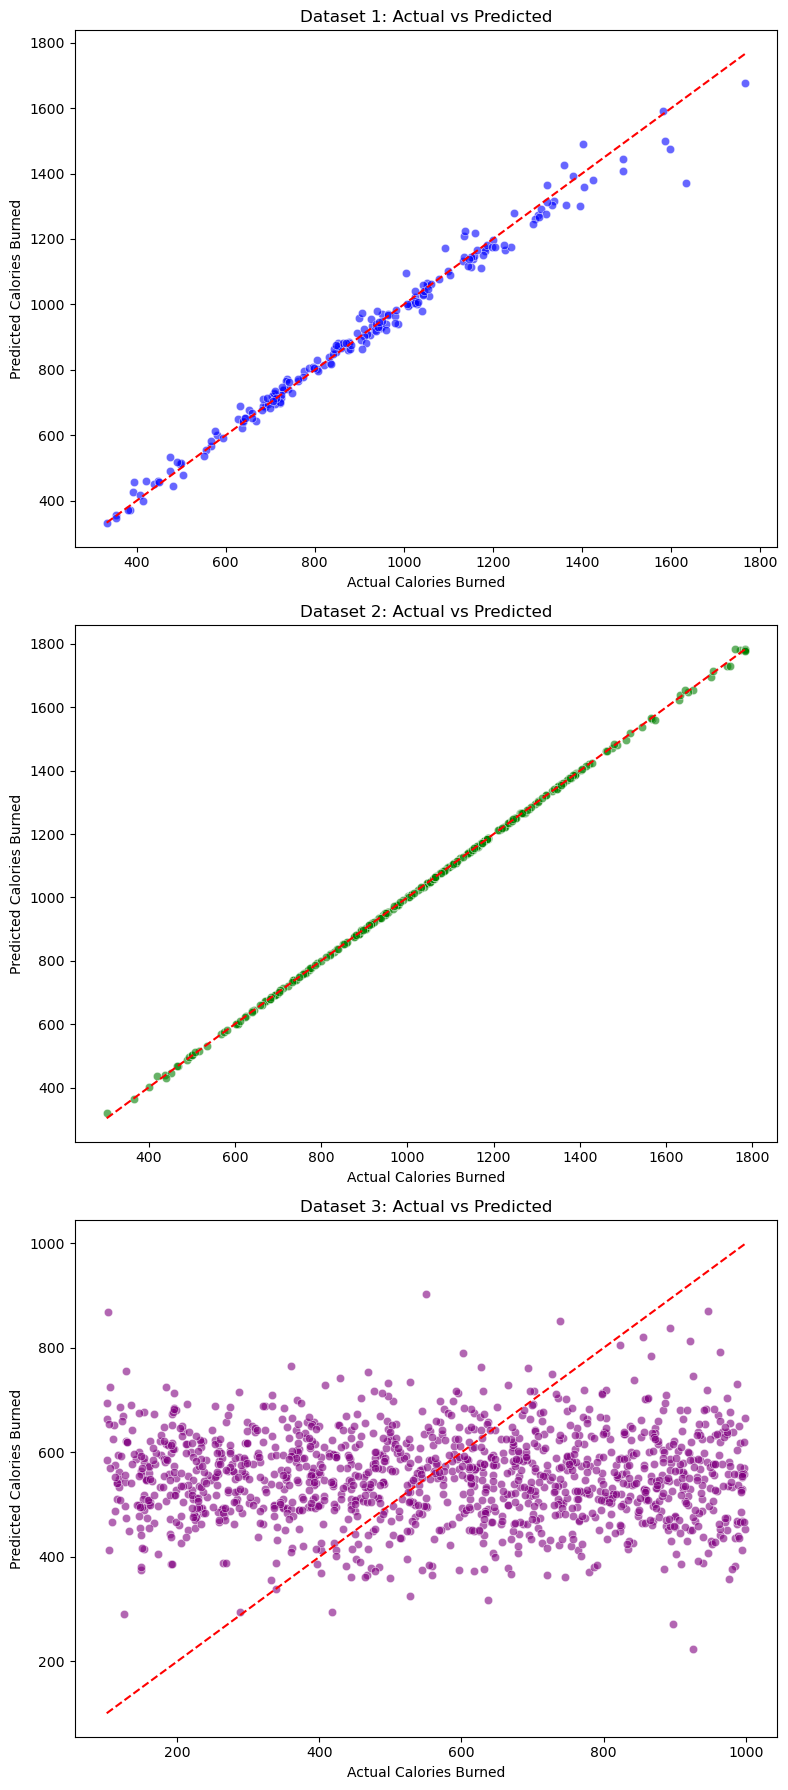

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 3 subplots for the 3 datasets
# Create a figure with 3 rows and 1 column (stacked vertically)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))  # Adjust figsize for better spacing


# Scatter plot for Dataset 1
sns.scatterplot(x=y_test_1, y=y_pred_1, ax=axes[0], color="blue", alpha=0.6)
axes[0].plot([min(y_test_1), max(y_test_1)], [min(y_test_1), max(y_test_1)], color='red', linestyle='--')
axes[0].set_title("Dataset 1: Actual vs Predicted")
axes[0].set_xlabel("Actual Calories Burned")
axes[0].set_ylabel("Predicted Calories Burned")

# Scatter plot for Dataset 2
sns.scatterplot(x=y_test_2, y=y_pred_2, ax=axes[1], color="green", alpha=0.6)
axes[1].plot([min(y_test_2), max(y_test_2)], [min(y_test_2), max(y_test_2)], color='red', linestyle='--')
axes[1].set_title("Dataset 2: Actual vs Predicted")
axes[1].set_xlabel("Actual Calories Burned")
axes[1].set_ylabel("Predicted Calories Burned")

# Scatter plot for Dataset 3
sns.scatterplot(x=y_test_3, y=y_pred_3, ax=axes[2], color="purple", alpha=0.6)
axes[2].plot([min(y_test_3), max(y_test_3)], [min(y_test_3), max(y_test_3)], color='red', linestyle='--')
axes[2].set_title("Dataset 3: Actual vs Predicted")
axes[2].set_xlabel("Actual Calories Burned")
axes[2].set_ylabel("Predicted Calories Burned")

plt.tight_layout()
plt.show()
